In [35]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import ShuffleSplit, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [36]:
df = pd.read_csv("./Group1_Telco_Churn_Final.csv")
df.columns
df_Y = pd.DataFrame()
df_Y['Churn'] = df['Churn']
df = df.drop(columns=['Churn', 'customerID'], axis=1)
df.columns
df.info()
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             7043 non-null   object 
 1   SeniorCitizen      7043 non-null   int64  
 2   Partner            7043 non-null   object 
 3   Dependents         7043 non-null   object 
 4   tenure             7043 non-null   int64  
 5   PhoneService       7043 non-null   object 
 6   MultipleLines      7043 non-null   object 
 7   InternetService    7043 non-null   object 
 8   OnlineSecurity     7043 non-null   object 
 9   OnlineBackup       7043 non-null   object 
 10  DeviceProtection   7043 non-null   object 
 11  TechSupport        7043 non-null   object 
 12  StreamingTV        7043 non-null   object 
 13  StreamingMovies    7043 non-null   object 
 14  Contract           7043 non-null   object 
 15  PaperlessBilling   7043 non-null   object 
 16  PaymentMethod      7043 

In [37]:
df_after_cleaning = df.copy()
df_after_cleaning.info()
df_after_cleaning = df_after_cleaning.drop(columns=['SeniorCitizen','MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
'TechSupport', 'StreamingTV', 'StreamingMovies', 'TotalCharges'], axis=1)
# drop InternetService later
df_after_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             7043 non-null   object 
 1   SeniorCitizen      7043 non-null   int64  
 2   Partner            7043 non-null   object 
 3   Dependents         7043 non-null   object 
 4   tenure             7043 non-null   int64  
 5   PhoneService       7043 non-null   object 
 6   MultipleLines      7043 non-null   object 
 7   InternetService    7043 non-null   object 
 8   OnlineSecurity     7043 non-null   object 
 9   OnlineBackup       7043 non-null   object 
 10  DeviceProtection   7043 non-null   object 
 11  TechSupport        7043 non-null   object 
 12  StreamingTV        7043 non-null   object 
 13  StreamingMovies    7043 non-null   object 
 14  Contract           7043 non-null   object 
 15  PaperlessBilling   7043 non-null   object 
 16  PaymentMethod      7043 

In [38]:

dummies_columns = [i for i in df_after_cleaning.columns if i not in ['tenure', 'MonthlyCharges', 'total_charges']]
df_after_cleaning = pd.get_dummies(df_after_cleaning, columns=dummies_columns, drop_first=True)
df_after_cleaning[['tenure', 'total_charges', 'MonthlyCharges']] = df_after_cleaning[['tenure', 'total_charges', 'MonthlyCharges']].apply(pd.to_numeric, errors='coerce')
df_after_cleaning.to_csv("df_after_cleaning_final.csv")
df_after_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7043 non-null   int64  
 1   MonthlyCharges                         7043 non-null   float64
 2   total_charges                          7043 non-null   float64
 3   gender_Male                            7043 non-null   bool   
 4   Partner_Yes                            7043 non-null   bool   
 5   Dependents_Yes                         7043 non-null   bool   
 6   PhoneService_Yes                       7043 non-null   bool   
 7   InternetService_Fiber optic            7043 non-null   bool   
 8   InternetService_No                     7043 non-null   bool   
 9   Contract_One year                      7043 non-null   bool   
 10  Contract_Two year                      7043 non-null   bool   
 11  Pape

In [39]:
X = df_after_cleaning.values
Y = df_Y.values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Scalar
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

# SMOTE
sm = SMOTE(random_state=42)
X_train_somte, Y_train_somte = sm.fit_resample(X_train_scaled, Y_train)


# Random Forest 
rfc = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rfc.fit(X_train_somte, Y_train_somte)

# Confusion Matrix
Y_pred = rfc.predict(X_test_scaled)
print(f"Confusion matrix: \n{confusion_matrix(Y_test, Y_pred)}")
print(f"Classification Report: \n{classification_report(Y_test, Y_pred)}")
print(f"Accuracy: \n{accuracy_score(Y_test, Y_pred)}")

Confusion matrix: 
[[1328  211]
 [ 238  336]]
Classification Report: 
              precision    recall  f1-score   support

          No       0.85      0.86      0.86      1539
         Yes       0.61      0.59      0.60       574

    accuracy                           0.79      2113
   macro avg       0.73      0.72      0.73      2113
weighted avg       0.78      0.79      0.79      2113

Accuracy: 
0.7875059157595835


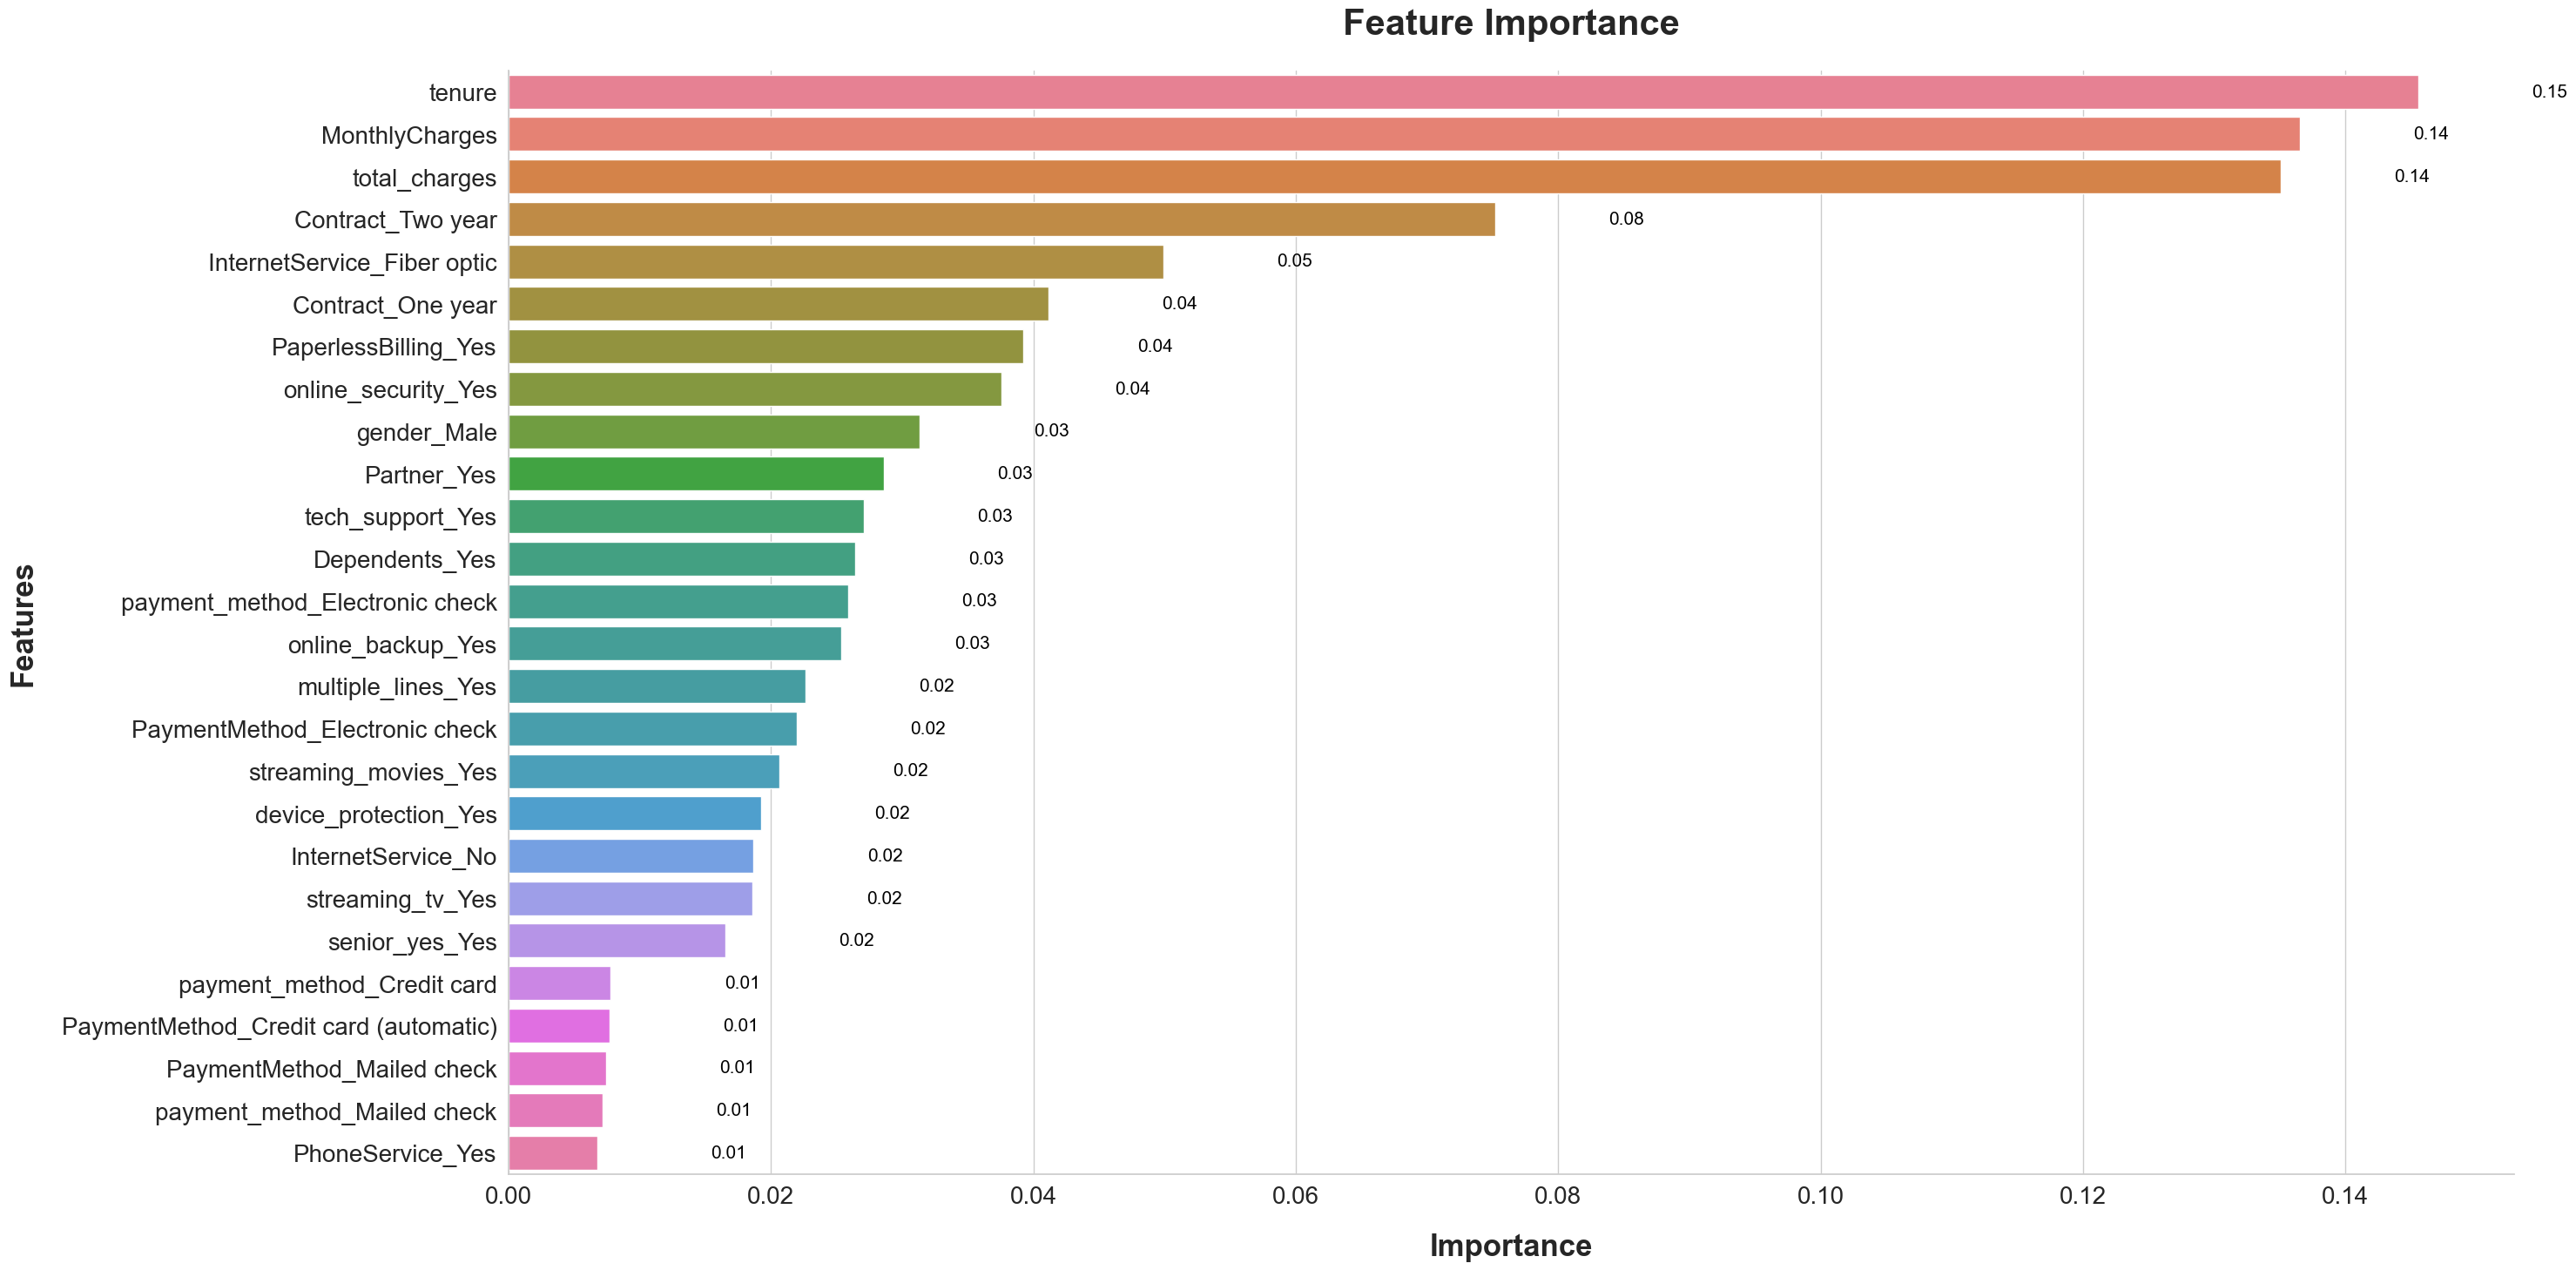

In [40]:
feats = {}
for feature, importance in zip(df_after_cleaning.columns[:30], rfc.feature_importances_[:30]):
    feats[feature] = importance
    importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
    importances = importances.sort_values(by='Gini-Importance', ascending=False)
    importances = importances.reset_index()
    importances = importances.rename(columns={'index': 'Features'})


# 设置字体和风格
sns.set(style="whitegrid", font_scale=1.7)

# 创建绘图
fig, ax = plt.subplots()
fig.set_size_inches(30, 15)

sns.barplot(
    x=importances['Gini-Importance'], 
    y=importances['Features'], 
    hue=importances['Features'],  # Set hue to the y variable
    dodge=False,  # Prevents splitting bars when hue is used
    legend=False  # Removes the legend
)

# set the label
for i in ax.patches:
    ax.text(i.get_width() + 0.01, i.get_y() + i.get_height() / 2, 
            f'{i.get_width():.2f}', ha='center', va='center', fontsize=15, color='black')

ax.set_xlabel('Importance', fontsize=25, weight='bold', labelpad=20)
ax.set_ylabel('Features', fontsize=25, weight='bold', labelpad=20)
ax.set_title('Feature Importance', fontsize=30, weight='bold', pad=30)

# 去掉图的顶部和右侧边框
sns.despine(left=False, bottom=False)

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

plt.tight_layout()

plt.show()
#display(importances)

In [41]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rs = RandomizedSearchCV(rfc, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)
rs.fit(X_train, Y_train.ravel())
rs.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 700,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 11,
 'bootstrap': True}

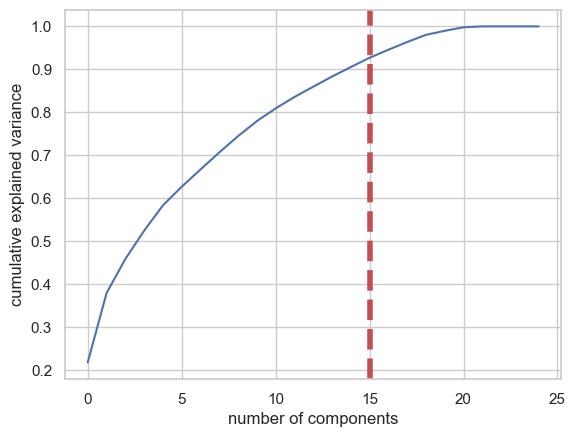

None

In [42]:
pca_test = PCA(n_components=25)
pca_test.fit(X_train_somte)

sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle='--', x=15, ymin=0, ymax=1)
display(plt.show())

evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)

pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
#display(pca_df.head())

In [43]:
rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
rs_df.head(10)

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,mean_test_score,rank_test_score
0,700,2,2,log2,11,True,0.777075,1
1,700,12,2,sqrt,13,False,0.769775,2
2,1000,12,7,sqrt,10,True,0.763487,3
3,600,23,2,sqrt,15,False,0.761864,4
4,400,23,2,sqrt,14,False,0.761256,5
5,400,23,12,sqrt,11,True,0.761053,6
6,300,28,7,log2,13,True,0.760850,7
7,800,28,12,sqrt,14,True,0.760648,8
8,1000,44,2,sqrt,9,True,0.759228,9
9,300,18,18,sqrt,13,True,0.758214,10


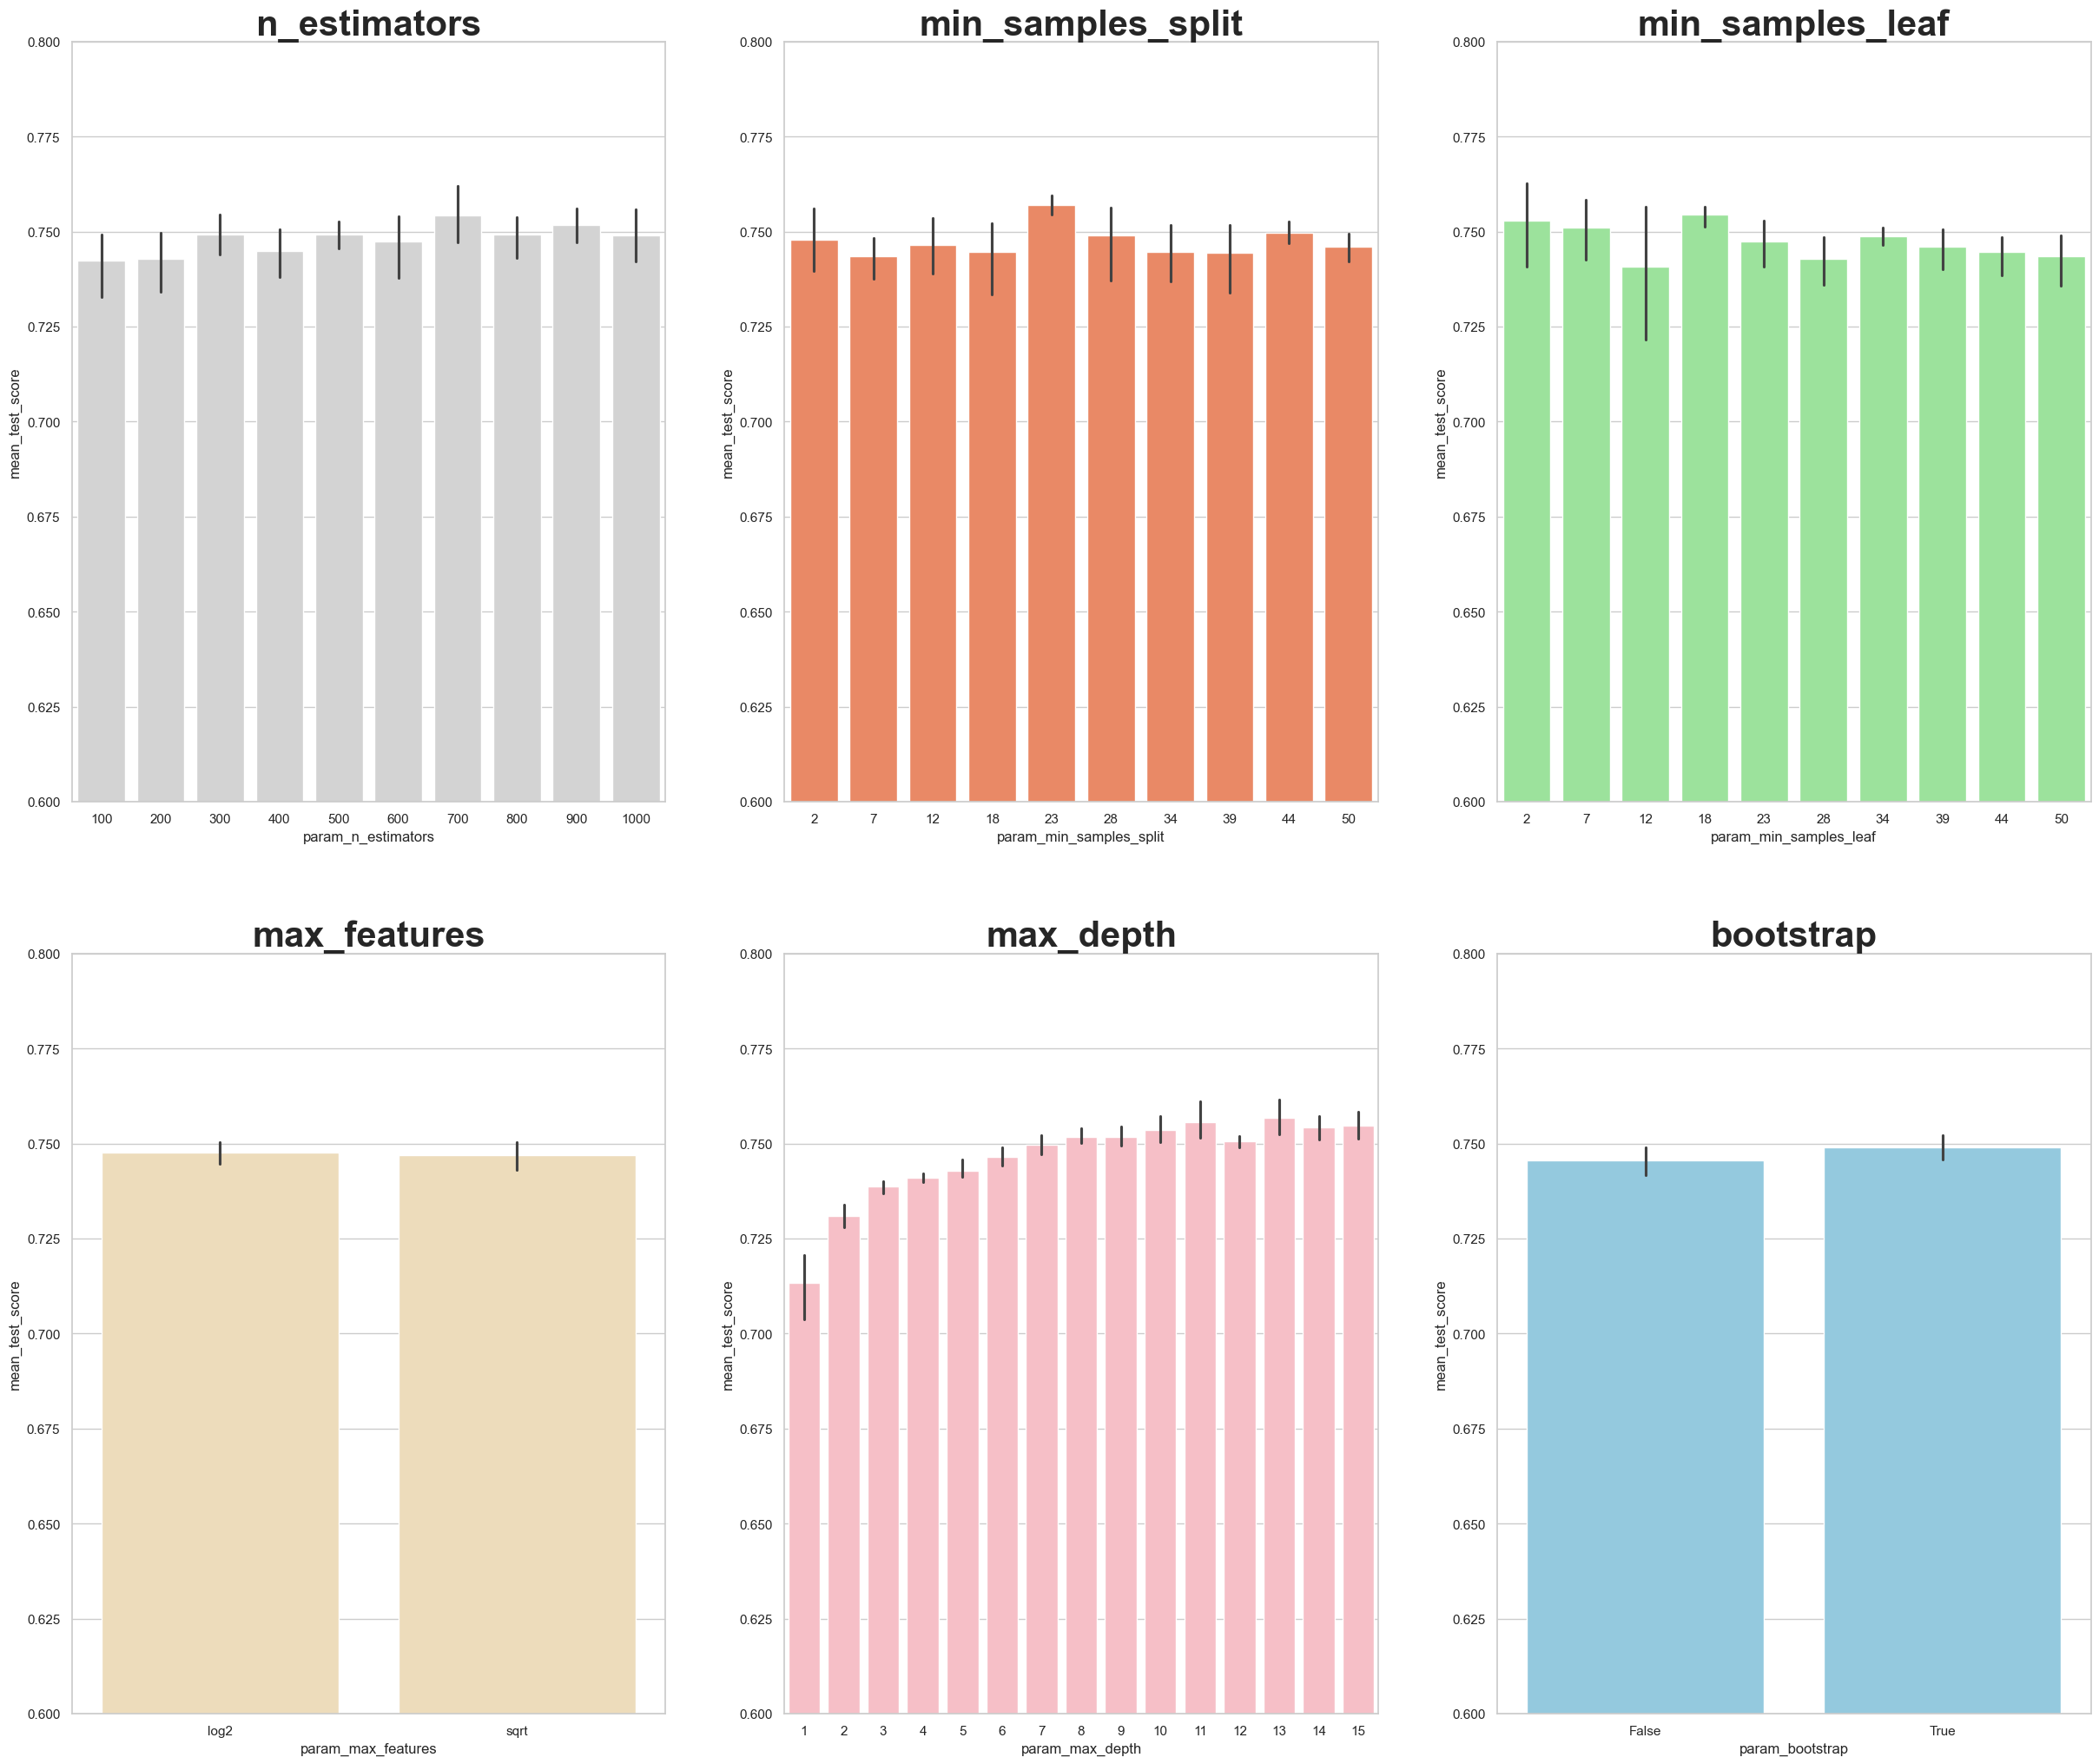

In [44]:
fig, axs = plt.subplots(ncols=3, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(30,25)

sns.barplot(x='param_n_estimators', y='mean_test_score', data=rs_df, ax=axs[0,0], color='lightgrey')
axs[0,0].set_ylim([.6,.8])
axs[0,0].set_title(label = 'n_estimators', size=30, weight='bold')

sns.barplot(x='param_min_samples_split', y='mean_test_score', data=rs_df, ax=axs[0,1], color='coral')
axs[0,1].set_ylim([.6,.8])
axs[0,1].set_title(label = 'min_samples_split', size=30, weight='bold')

sns.barplot(x='param_min_samples_leaf', y='mean_test_score', data=rs_df, ax=axs[0,2], color='lightgreen')
axs[0,2].set_ylim([.6,.8])
axs[0,2].set_title(label = 'min_samples_leaf', size=30, weight='bold')

sns.barplot(x='param_max_features', y='mean_test_score', data=rs_df, ax=axs[1,0], color='wheat')
axs[1,0].set_ylim([.6,.8])
axs[1,0].set_title(label = 'max_features', size=30, weight='bold')

sns.barplot(x='param_max_depth', y='mean_test_score', data=rs_df, ax=axs[1,1], color='lightpink')
axs[1,1].set_ylim([.6,.8])
axs[1,1].set_title(label = 'max_depth', size=30, weight='bold')

sns.barplot(x='param_bootstrap',y='mean_test_score', data=rs_df, ax=axs[1,2], color='skyblue')
axs[1,2].set_ylim([.6,.8])
axs[1,2].set_title(label = 'bootstrap', size=30, weight='bold')
plt.show()

In [45]:
"""
{'n_estimators': 700,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 11,
 'bootstrap': True}
 """
rfc_with_hyperparameter = RandomForestClassifier(
    n_estimators=700,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features='log2',
    max_depth=11,
    bootstrap=True,
    class_weight='balanced'
)

rfc_with_hyperparameter.fit(X_train_somte, Y_train_somte)

Y_pred_2 = rfc_with_hyperparameter.predict(X_test_scaled)
print(f"Confusion matrix: \n{confusion_matrix(Y_test, Y_pred_2)}")
print(f"Classification Report: \n{classification_report(Y_test, Y_pred_2)}")
print(f"Accuracy: \n{accuracy_score(Y_test, Y_pred_2)}")

Confusion matrix: 
[[1245  294]
 [ 158  416]]
Classification Report: 
              precision    recall  f1-score   support

          No       0.89      0.81      0.85      1539
         Yes       0.59      0.72      0.65       574

    accuracy                           0.79      2113
   macro avg       0.74      0.77      0.75      2113
weighted avg       0.81      0.79      0.79      2113

Accuracy: 
0.7860861334595362


In [46]:
# 定义基模型
base_models = [
    ('rf',  RandomForestClassifier(
    n_estimators=700,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features='log2',
    max_depth=11,
    bootstrap=True,
    class_weight='balanced')),
    ('gb', GradientBoostingClassifier(subsample=0.8,
                                      n_estimators=300, 
                                      min_samples_split=10,
                                      min_samples_leaf=2,
                                      max_features='log2',
                                      max_depth=7,
                                      learning_rate=0.5, 
                                      random_state=42))
]
# 定义元学习器
meta_model = LogisticRegression()

# 创建 StackingClassifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# 训练 Stacking 模型
stacking_clf.fit(X_train_somte, Y_train_somte)

Y_pred_3 = stacking_clf.predict(X_test_scaled)
print(f"Confusion matrix: \n{confusion_matrix(Y_test, Y_pred_3)}")
print(f"Classification Report: \n{classification_report(Y_test, Y_pred_3)}")
print(f"Accuracy: \n{accuracy_score(Y_test, Y_pred_3)}")

Confusion matrix: 
[[1291  248]
 [ 207  367]]
Classification Report: 
              precision    recall  f1-score   support

          No       0.86      0.84      0.85      1539
         Yes       0.60      0.64      0.62       574

    accuracy                           0.78      2113
   macro avg       0.73      0.74      0.73      2113
weighted avg       0.79      0.78      0.79      2113

Accuracy: 
0.7846663511594889


In [47]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train_somte, Y_train_somte)
gb_pred = gb.predict(X_test_scaled)
print(f"Confusion matrix: \n{confusion_matrix(Y_test, gb_pred)}")
print(f"Classification Report: \n{classification_report(Y_test, gb_pred)}")
print(f"Accuracy: \n{accuracy_score(Y_test, gb_pred)}")

Confusion matrix: 
[[1273  266]
 [ 171  403]]
Classification Report: 
              precision    recall  f1-score   support

          No       0.88      0.83      0.85      1539
         Yes       0.60      0.70      0.65       574

    accuracy                           0.79      2113
   macro avg       0.74      0.76      0.75      2113
weighted avg       0.81      0.79      0.80      2113

Accuracy: 
0.7931850449597728


In [48]:
from sklearn.model_selection import RandomizedSearchCV
# Step 1: Define the hyperparameter grid
param_dist = {
    'n_estimators': [50, 100, 200, 300],           # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1, 0.2],      # Shrinks contribution of each tree
    'max_depth': [3, 4, 5, 6, 7],                 # Maximum depth of individual estimators
    'min_samples_split': [2, 5, 10],              # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],                # Minimum number of samples in a leaf
    'subsample': [0.6, 0.8, 1.0],                 # Fraction of samples used for fitting each tree
    'max_features': ['auto', 'sqrt', 'log2'],     # Number of features considered for best split
}

# Step 2: Initialize the model
gb = GradientBoostingClassifier(random_state=42)

# Step 3: RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=gb,            # The model
    param_distributions=param_dist,  # Hyperparameter search space
    n_iter=50,               # Number of random combinations to try
    scoring='accuracy',       # Scoring metric
    cv=5,                    # 5-fold cross-validation
    verbose=2,               # Display progress
    random_state=42,         # For reproducibility
    n_jobs=-1                # Use all available processors
)

# Step 4: Fit RandomizedSearchCV to the training data
random_search.fit(X_train_somte, Y_train_somte)

# Step 5: Get the best model from random search
best_gb = random_search.best_estimator_

# Step 6: Make predictions on the test set
gb_pred = best_gb.predict(X_test_scaled)

# Step 7: Evaluate the model
print(f"Best Parameters found: {random_search.best_params_}")
print(f"Confusion Matrix: \n{confusion_matrix(Y_test, gb_pred)}")
print(f"Classification Report: \n{classification_report(Y_test, gb_pred)}")
print(f"Accuracy: {accuracy_score(Y_test, gb_pred)}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, subsample=0.6; total time=   0.0s
[CV] END learning_ra

/Users/yanhanjun/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
60 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
53 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/yanhanjun/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yanhanjun/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/yanhanjun/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_p

Best Parameters found: {'subsample': 0.8, 'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 7, 'learning_rate': 0.05}
Confusion Matrix: 
[[1324  215]
 [ 230  344]]
Classification Report: 
              precision    recall  f1-score   support

          No       0.85      0.86      0.86      1539
         Yes       0.62      0.60      0.61       574

    accuracy                           0.79      2113
   macro avg       0.73      0.73      0.73      2113
weighted avg       0.79      0.79      0.79      2113

Accuracy: 0.7893989588263133


In [49]:
Y_train_somte = pd.get_dummies(Y_train_somte, drop_first=True)
Y_train_somte
Y_test
Y_test_df = pd.DataFrame(Y_test)
Y_test_df = pd.get_dummies(Y_test_df, drop_first=True)
≈

SyntaxError: invalid character '≈' (U+2248) (1706594038.py, line 6)

In [34]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Step 1: Initialize the model
xgb = XGBClassifier(
    n_estimators=100,       # The number of boosting rounds
    learning_rate=0.1,      # Shrinkage rate (step size)
    max_depth=5,            # Maximum depth of trees
    random_state=42         # Seed for reproducibility
)

xgb.fit(X_train_somte, Y_train_somte)
xgb_pred = xgb.predict(X_test_scaled)
print(f"Confusion matrix: \n{confusion_matrix(Y_test_df, xgb_pred)}")
print(f"Classification Report: \n{classification_report(Y_test_df, xgb_pred)}")
print(f"Accuracy: \n{accuracy_score(Y_test_df, xgb_pred)}")

Confusion matrix: 
[[1284  255]
 [ 196  378]]
Classification Report: 
              precision    recall  f1-score   support

       False       0.87      0.83      0.85      1539
        True       0.60      0.66      0.63       574

    accuracy                           0.79      2113
   macro avg       0.73      0.75      0.74      2113
weighted avg       0.79      0.79      0.79      2113

Accuracy: 
0.7865593942262187
